In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/predicting-credit-card-customer-attrition-with-m")

print("Path to dataset files:", path)

100%|██████████| 379k/379k [00:00<00:00, 77.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m/versions/3


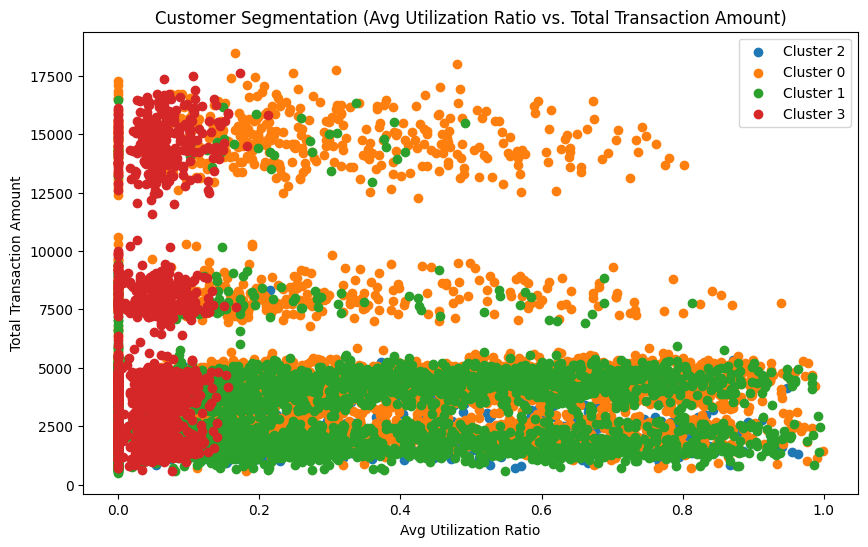

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...                  777          11914.0   
1              44  ...              

In [8]:
import kagglehub
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Download dataset using KaggleHub
path = kagglehub.dataset_download("thedevastator/predicting-credit-card-customer-attrition-with-m")
file_path = f"{path}/BankChurners.csv"

# Load dataset directly from KaggleHub path
bank_data = pd.read_csv(file_path, encoding="latin1")

# Select relevant numeric columns for clustering
features = [
    "Customer_Age",
    "Months_on_book",
    "Credit_Limit",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio"
]
segmentation_data = bank_data[features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmentation_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
bank_data["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualize clusters (e.g., Avg_Utilization_Ratio vs. Total_Trans_Amt)
plt.figure(figsize=(10, 6))
for cluster in bank_data["Cluster"].unique():
    cluster_data = bank_data[bank_data["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Avg_Utilization_Ratio"],
        cluster_data["Total_Trans_Amt"],
        label=f"Cluster {cluster}"
    )
plt.title("Customer Segmentation (Avg Utilization Ratio vs. Total Transaction Amount)")
plt.xlabel("Avg Utilization Ratio")
plt.ylabel("Total Transaction Amount")
plt.legend()
plt.show()

# Print a sample of the clustered data
print(bank_data.head())


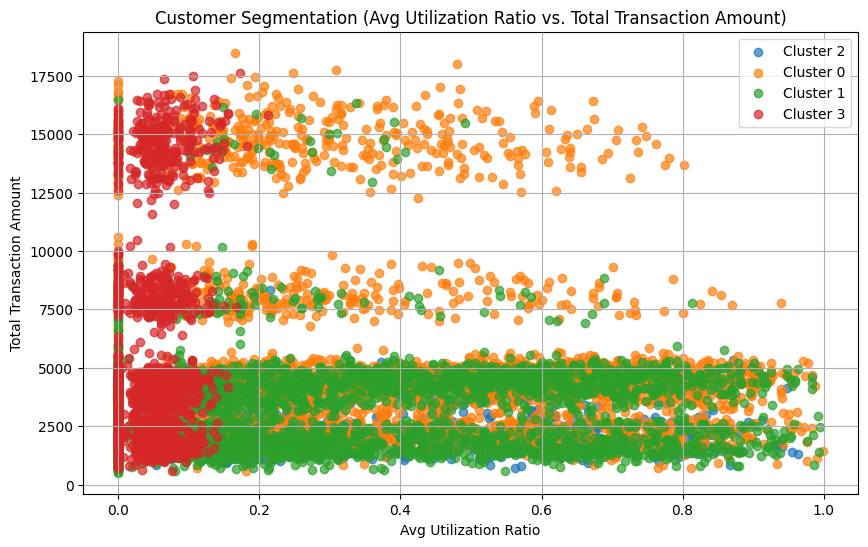

<ipython-input-9-04566e84a50d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_avg_trans_amt, x="Cluster", y="Total_Trans_Amt", palette="viridis")


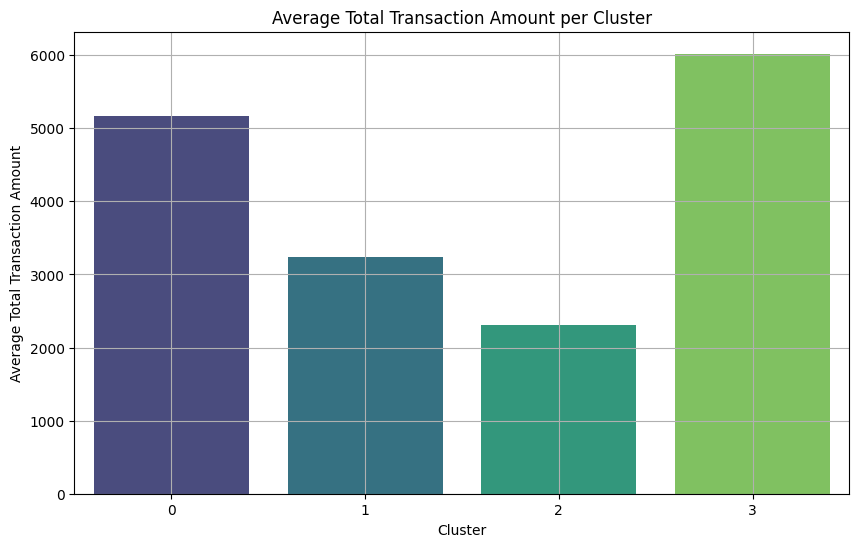

<ipython-input-9-04566e84a50d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x="Cluster", y="Credit_Limit", palette="Set2")


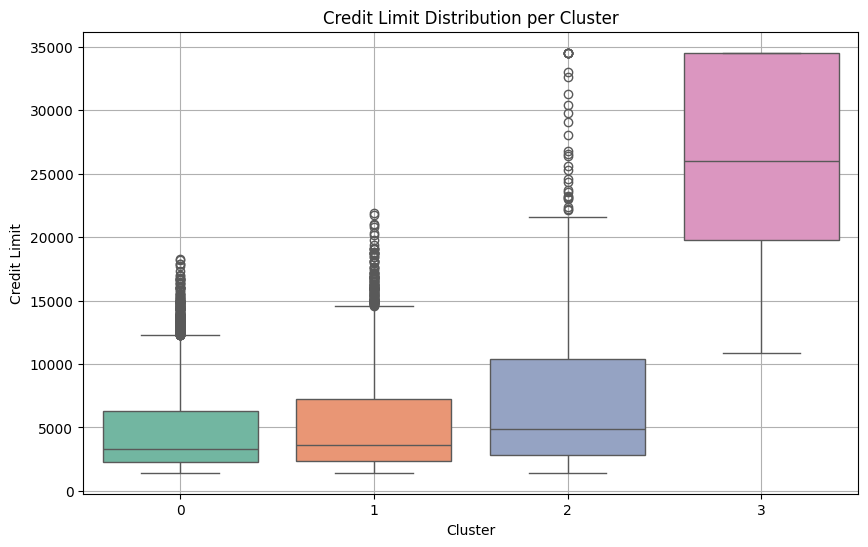

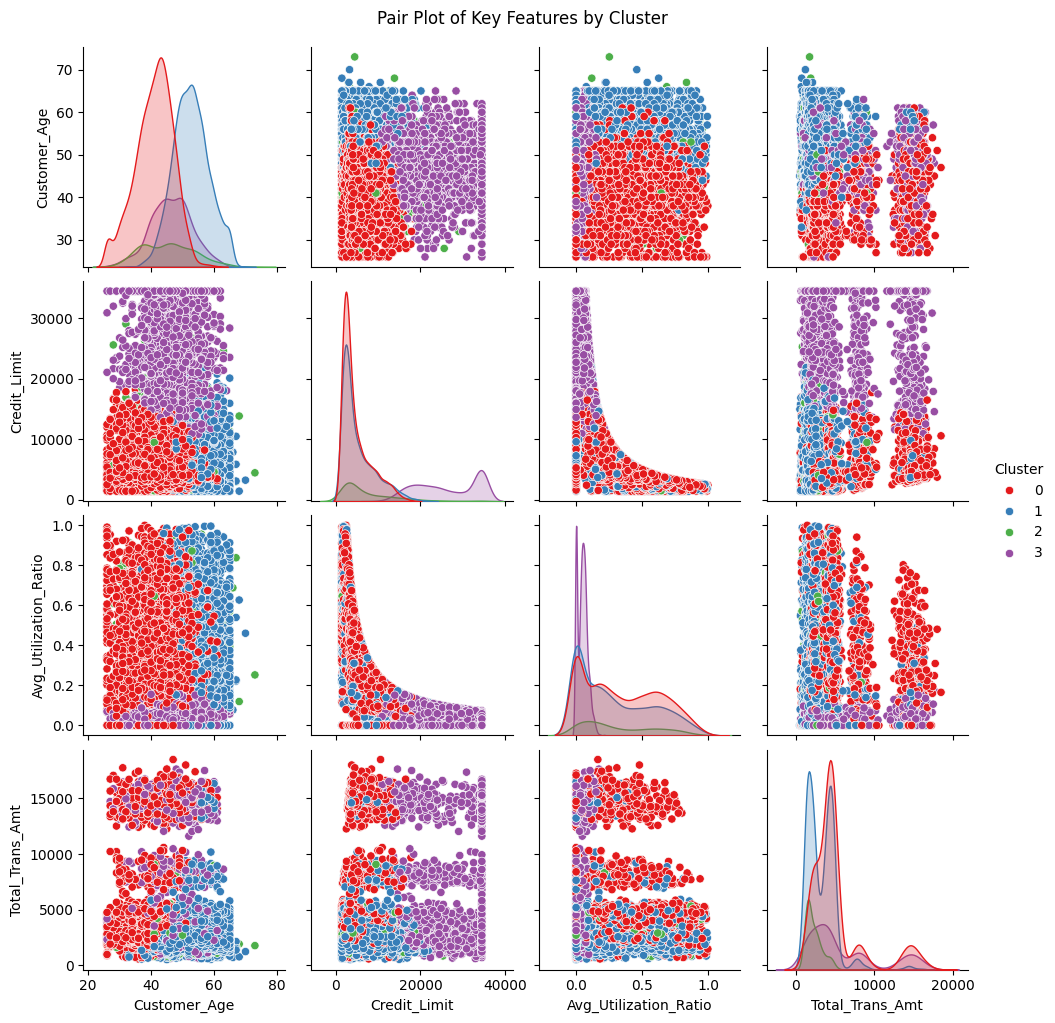

In [9]:
import seaborn as sns

# Scatter Plot: Avg_Utilization_Ratio vs. Total_Trans_Amt
plt.figure(figsize=(10, 6))
for cluster in bank_data["Cluster"].unique():
    cluster_data = bank_data[bank_data["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Avg_Utilization_Ratio"],
        cluster_data["Total_Trans_Amt"],
        label=f"Cluster {cluster}",
        alpha=0.7
    )
plt.title("Customer Segmentation (Avg Utilization Ratio vs. Total Transaction Amount)")
plt.xlabel("Avg Utilization Ratio")
plt.ylabel("Total Transaction Amount")
plt.legend()
plt.grid()
plt.show()

# Bar Plot: Average Total Transaction Amount per Cluster
cluster_avg_trans_amt = bank_data.groupby("Cluster")["Total_Trans_Amt"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_avg_trans_amt, x="Cluster", y="Total_Trans_Amt", palette="viridis")
plt.title("Average Total Transaction Amount per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Total Transaction Amount")
plt.grid()
plt.show()

# Box Plot: Credit Limit Distribution per Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=bank_data, x="Cluster", y="Credit_Limit", palette="Set2")
plt.title("Credit Limit Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Credit Limit")
plt.grid()
plt.show()

# Pair Plot: Visualize Relationships Between Key Features
key_features = [
    "Customer_Age",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
    "Total_Trans_Amt",
    "Cluster"
]
sns.pairplot(bank_data[key_features], hue="Cluster", palette="Set1", diag_kind="kde", height=2.5)
plt.suptitle("Pair Plot of Key Features by Cluster", y=1.02)
plt.show()
